In [2]:
###
#Goal: See how varying SRM HR curvature will affect the sensitivity to the interferometer.
#First we use all of the aLIGO cavities to derive the ideal mode-matching parameters
#then we extract the beam q from the PRC, ITMX, and ITMY
#then we inject the previously extracted beam parameters with the "gauss" Command and slowly vary the SRM curvature
#to achieve an "almost" perfect mode-matching setup.
#we leave OMC untouched so that it will just have the SRC mismodematch propogated downstream.
###

In [3]:
%matplotlib inline
import pykat
import pylab as pl
import pandas
import matplotlib.pyplot as plt
import matplotlib
import csv
import math
import numpy as np
from pykat.parallel import parakat
from PropBeam import *

pandas.set_eng_float_format(accuracy=3, use_eng_prefix=True)

                                              ..-
    PyKat 1.0.8           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [4]:
####Perfect Mode-Matching Version:
katfile = "aLIGO_IFO_AWC_tuning_DCoff_maxtem4.kat"
#katfile = "aligo_IFO_maxtem2.kat"

basekat = pykat.finesse.kat()
basekat.loadKatFile(katfile)

# Add cavity parameter detectors
basekat.parseCommands("""
tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor


# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1

#sq sqz 0 10 0 nsqz

bp OFI_outqx x q nOBAout
bp OFI_outqy y q nOBAout

cp cavOMC x q

cp cavOMC x z

qnoisedS NSR_with_RP    1 $fs nOMC_AROC_trans

xaxis darm f log 5 5k 50

yaxis lin re:im
""")

basekat.undumpNodes() #undump the vacuum nodes
kat=basekat.deepcopy() #copy kat code
kat.verbose = False
out = kat.run()

OFI_outqx = out["OFI_outqx"]
OFI_outqy = out["OFI_outqy"]

OMC_Waist_Location = out["cavOMC_x_z"][0].real #distance from first optic in cavity(OMC_HR surface) to the waist

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.


In [5]:
kat1=basekat.deepcopy() #copy kat code
kat.verbose = False

ITMTL0 = kat1.ITMXTL.f.value
d_mismatch = []
OFI_outqx = []
OFI_outqy = []
darm = []

In [6]:
kat1.ITMXTL.f.value

34500.0

In [7]:
dp = 10 #Steps
diopters = 20e-6 #Estimated Avg fluctuations in TCS

for i in range(dp+1):
    mm = diopters*(float(i)/dp)
    print(float(i)/dp)
    f_new = (1/ITMTL0 + mm)**(-1)
    kat1.ITMXTL.f = f_new
    print(kat1.ITMXTL.f)
    outs = kat1.run()
    d_mismatch.append(  mm )
    OFI_outqx.append(outs["OFI_outqx"])
    OFI_outqy.append(outs["OFI_outqy"])
    darm.append(outs["NSR_with_RP"])
    
for i in range(dp+1):
    mm = diopters*(float(i)/dp)
    print(float(i)/dp)
    f_new = (1/ITMTL0 - mm)**(-1)
    kat1.ITMXTL.f = f_new
    print(f_new)
    outs = kat1.run()
    d_mismatch.append(  -mm )
    OFI_outqx.append(outs["OFI_outqx"])
    OFI_outqy.append(outs["OFI_outqy"])
    darm.append(outs["NSR_with_RP"])

0.0
34500.0
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:14.743828


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.20931 seconds
0.1
32273.152478952295
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:16.953465


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.28975 seconds
0.2
30316.344463971884
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:19.243590


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.21677 seconds
0.3
28583.264291632146
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:21.460732


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.22391 seconds
0.4
27037.617554858934
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:23.684963


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.25075 seconds
0.5
25650.557620817843
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:25.936084


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.19465 seconds
0.6
24398.868458274403
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:28.131102


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.20255 seconds
0.7
23263.65475387728
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:30.333992


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.21047 seconds
0.8
22229.38144329897
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:32.544867


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.22255 seconds
0.9
21283.158544108577
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:34.767776


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.5936 seconds
1.0
20414.201183431953
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:37.361945


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.49508 seconds
0.0
34500.0
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:39.857691


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.80247 seconds
0.1
37056.928034371645
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:42.660490


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.57084 seconds
0.2
40023.201856148495
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:45.231702


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.90752 seconds
0.3
43505.67465321564
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:48.139586


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.22508 seconds
0.4
47651.933701657465
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:50.365020


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.28561 seconds
0.5
52671.75572519085
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:52.650994


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.22561 seconds
0.6
58873.72013651878
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:54.876932


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.20817 seconds
0.7
66731.14119922632
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:57.085431


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.35311 seconds
0.8
77008.9285714286
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:25:59.438908


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.22643 seconds
0.9
91029.02374670186
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:26:01.665704


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 2.22952 seconds
1.0
111290.3225806452
--------------------------------------------------------------
Running kat - Started at 2016-08-19 15:26:03.895591

Finished in 2.38466 seconds


 99% | ETA:  0:00:00 | Calculating                                             

In [8]:
lam = 1064e-9
pi = 3.1415926

w = []
for i in range(0,len(OFI_outqx),1):
    psi = 1/OFI_outqx[i][0]
    w_i = (-lam/(pi*psi.imag))**(.5)
    w.append(w_i)

micro_d  =[]
mm_waist =[]
for i in range(0,len(OFI_outqx),1):
    micro_d.append(d_mismatch[i]*1e6)
    mm_waist.append(w[i]*1000)

/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


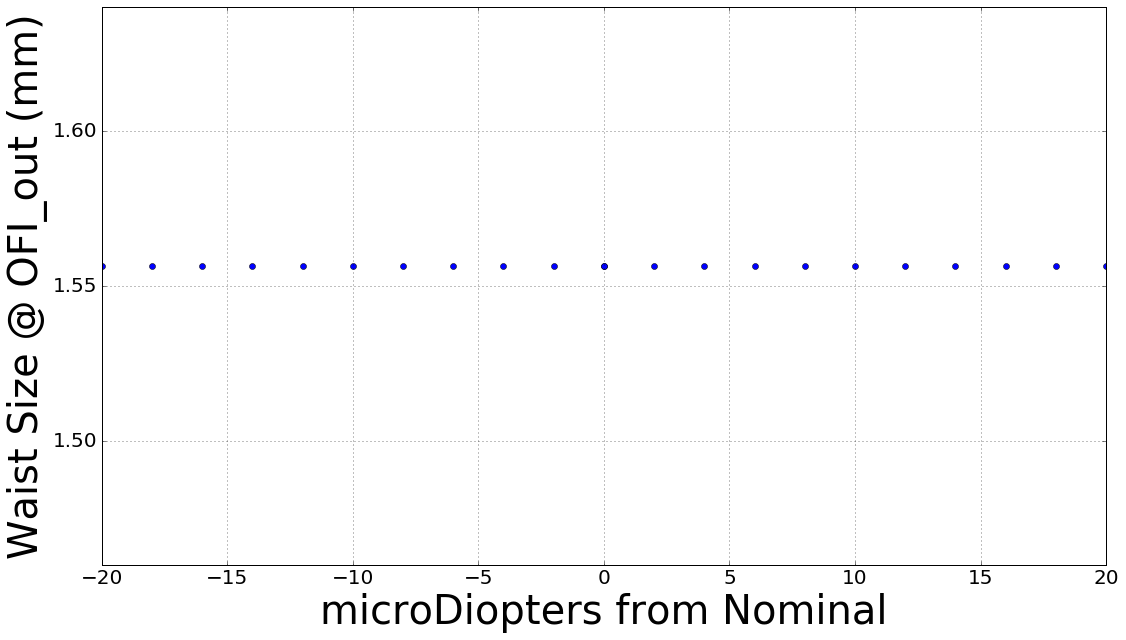

In [9]:
pl.figure(figsize=(18, 10), dpi=80)
pl.subplot(111)
pl.plot(micro_d, mm_waist, 'o')

pl.grid(True, zorder=-1)
pl.legend()

pl.xlabel("microDiopters from Nominal",  fontsize=40)
pl.ylabel("Waist Size @ OFI_out (mm)", fontsize=40)
pl.tick_params(labelsize=20)

#pl.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#pl.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


pl.show()

/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


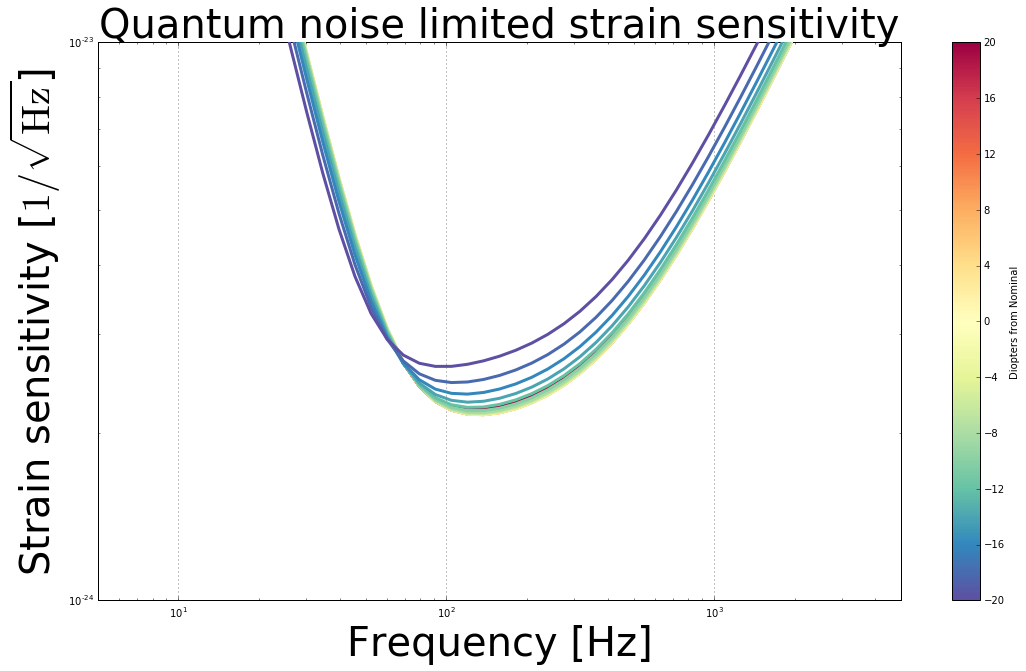

In [10]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(-20,20)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(darm)):
    c = c = s_m.to_rgba(micro_d[i])
    pl.subplot(111)
    pl.loglog(outs.x, np.real(darm[i]),linewidth=3,zorder=1000, color = c,)
    
pl.subplot(111)



pl.title("Quantum noise limited strain sensitivity",fontsize=40)
pl.xlim(outs.x.min(),outs.x.max())
pl.ylim(1e-24,1e-23)

pl.grid(True, zorder=-1)
pl.legend()

pl.xlabel("Frequency [Hz]",fontsize=40)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=40)

cb = pl.colorbar(s_m)
cb.set_label("Diopters from Nominal")
#pylab.savefig("fc_mismatch_to_sqz_ifo_maxtem_%i_sqzing_%g.pdf" % (maxtem, kat.sqz.db))


pl.show()

In [11]:
f = open('q_OFI_out.txt', 'w')
wr = csv.writer(f)
for i in range(0,len(micro_d),1):
        wr.writerow( [ micro_d[i], OFI_outqx[i][0] ])
f.close()

In [12]:


d1 = 2.724 # distance from OFI output to OM1
d2 = 1.395 # distance from OM1 to OM2
d3 = 0.631 # distance from OM2 to OM3
d4 = 0.196 # distance from OM3 to Input Coupler
d5 = 0.565   # distance from IC to end of OMC cavity. OMC round trip is 1.13


f1 = -4.6/2
f2 = 1.7058/2
f3 = math.inf
f4 = math.inf


w_full = []
d_full = []

for i in range(0,len(micro_d),1):
    q_in = OFI_outqx[i][0]
    tele = PropBeam(q_in,d1,d2,d3,d4,d5,f1,f2,f3,f4)
    out_modal = tele.FullModal()
    w_full.append( out_modal['w_modal'] )
    d_full.append( out_modal['d_modal'] )



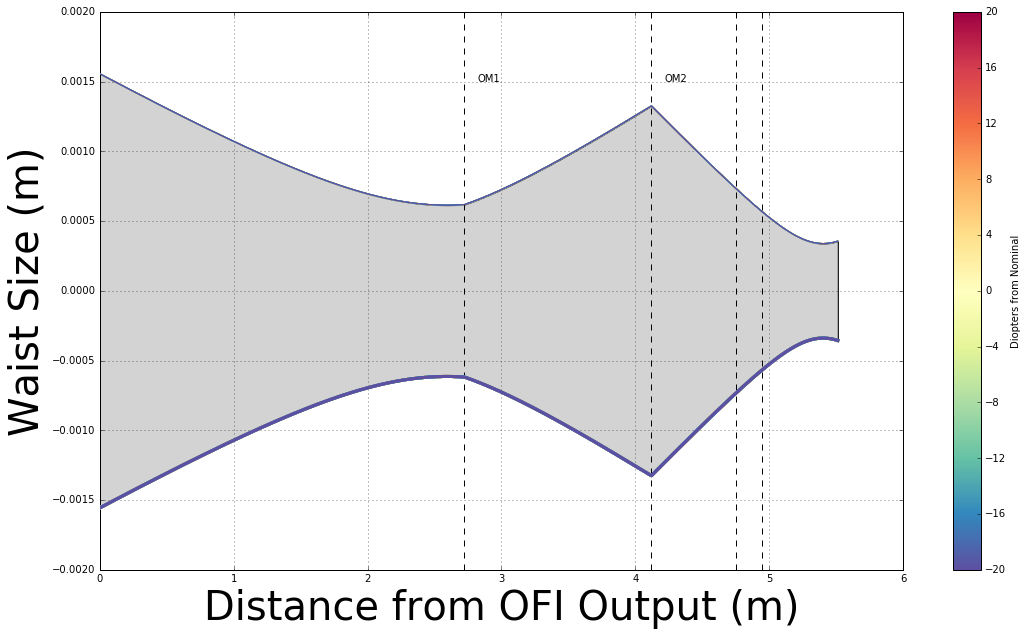

In [13]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(-20,20)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(micro_d)):
    c = c = s_m.to_rgba(micro_d[i])
    pl.subplot(111)
    pl.plot(d_full[0], w_full[i],linewidth=1,zorder=1000, color = c)
    neg = [ -x for x in w_full[i]]
    pl.plot(d_full[0], neg,linewidth=3,zorder=1000, color = c)
    pl.fill_between(d_full[0], w_full[i], neg, facecolor='lightgrey', alpha=0.5)
pl.subplot(111)


pl.axvline(x=d1,color='k',ls='dashed')
pl.axvline(x=d1+d2,color='k',ls='dashed')
pl.axvline(x=d1+d2+d3,color='k',ls='dashed')
pl.axvline(x=d1+d2+d3+d4,color='k',ls='dashed')

pl.annotate('OM1' ,xy=(d1+.1, .0015))
pl.annotate('OM2' ,xy=(d1+d2+.1, .0015))

#pl.title("Quantum noise limited strain sensitivity")
#pl.xlim(0,9)
#pl.ylim(-1,1)

pl.grid(True, zorder=-1)
#pl.legend()

pl.xlabel("Distance from OFI Output (m)",fontsize=40)
pl.ylabel("Waist Size (m)",fontsize=40)

cb = pl.colorbar(s_m)
cb.set_label("Diopters from Nominal")



In [14]:
#Extract the waist size and location
omc_waist_location = []
omc_waist_size = []

for i in range(0, len(micro_d),1):
    omc_waist_size.append(min(w_full[i]))
    index = w_full[i].index(min(w_full[i]))
    omc_waist_location.append(d_full[0][index])
    

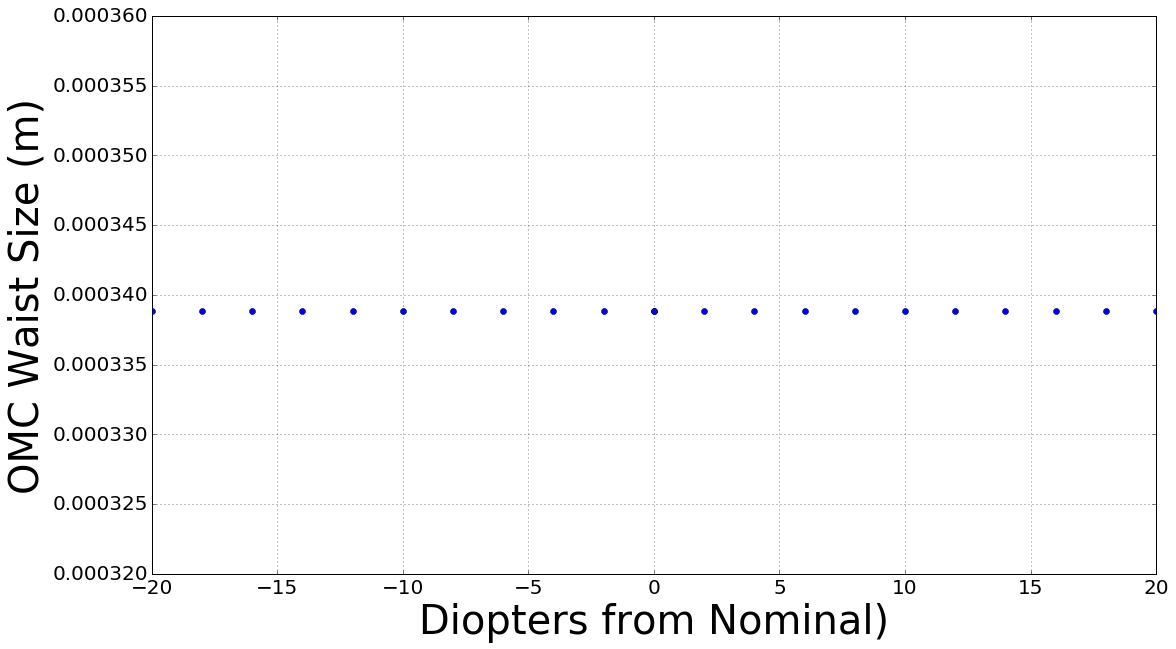

In [15]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)
pl.plot(micro_d, omc_waist_size, 'o')

pl.grid(True, zorder=-1)
pl.tick_params(labelsize=20)
pl.xlabel("Diopters from Nominal)",fontsize=40)
pl.ylabel("OMC Waist Size (m)",fontsize=40)

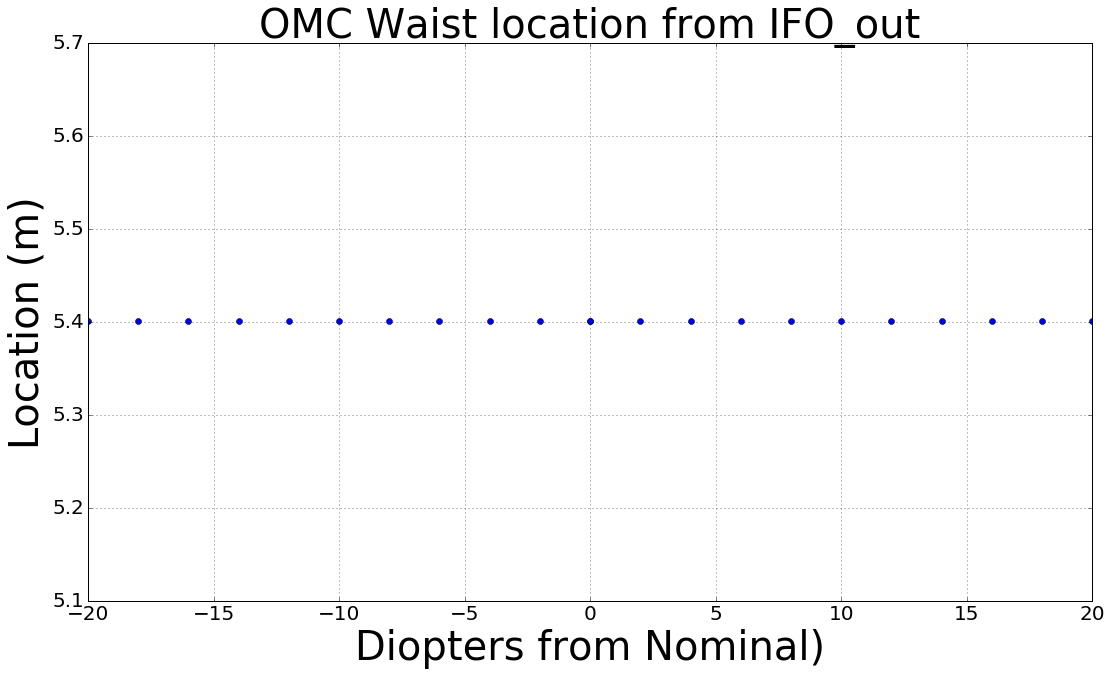

In [16]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)
pl.plot(micro_d, omc_waist_location, 'o')

pl.grid(True, zorder=-1)
pl.tick_params(labelsize=20)
pl.title("OMC Waist location from IFO_out",fontsize=40)
pl.xlabel("Diopters from Nominal)",fontsize=40)
pl.ylabel("Location (m)",fontsize=40)

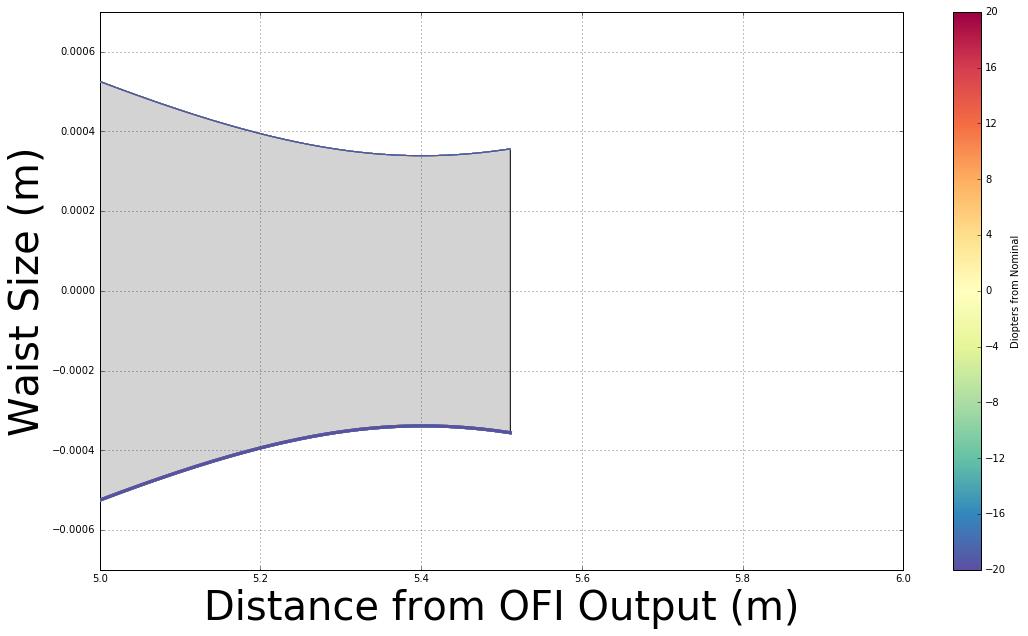

In [17]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(-20,20)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(micro_d)):
    c = c = s_m.to_rgba(micro_d[i])
    pl.subplot(111)
    pl.plot(d_full[0], w_full[i],linewidth=1,zorder=1000, color = c)
    neg = [ -x for x in w_full[i]]
    pl.plot(d_full[0], neg,linewidth=3,zorder=1000, color = c)
    pl.fill_between(d_full[0], w_full[i], neg, facecolor='lightgrey', alpha=0.5)
pl.subplot(111)

#pl.title("Quantum noise limited strain sensitivity")
pl.xlim(5.0,6.0)
pl.ylim(-.0007,.0007)

pl.grid(True, zorder=-1)
#pl.legend()

pl.xlabel("Distance from OFI Output (m)",fontsize=40)
pl.ylabel("Waist Size (m)",fontsize=40)

cb = pl.colorbar(s_m)
cb.set_label("Diopters from Nominal")


In [18]:
f = open('waist_location.txt', 'w')
wr = csv.writer(f)
for i in range(0,len(micro_d),1):
        wr.writerow([micro_d[i],omc_waist_location[i]])
f.close()


In [19]:
l = open('waist_size.txt', 'w')
wr = csv.writer(l)
for i in range(0,len(micro_d),1):
        wr.writerow([micro_d[i],omc_waist_size[i]])
l.close()


In [ ]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(19, 10), dpi=80)

pl.subplot(111)

pl.loglog(out.x, np.real(darm[21]),linewidth=3)
    


pl.title("Quantum noise limited strain sensitivity",fontsize=40)
pl.xlim(out.x.min(),out.x.max())
pl.ylim(1e-24,1e-23)

pl.grid(True, zorder=-1)
pl.legend()

pl.xlabel("Frequency [Hz]",fontsize=40)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=40)
